In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head(13)

D:\E\DataScientist\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [3]:
train.shape

(100000, 28)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
test = pd.read_csv('test.csv')
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
test.shape

(50000, 27)

In [8]:
test.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [9]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(150000, 28)

In [10]:
combined.head(13)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [11]:
combined.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

----------------

In [12]:
combined[combined['Monthly_Inhand_Salary'].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49964,0x25f8e,CUS_0xb11c,September,Yinka Adegokej,38,546-94-4789,Manager,15319.65,NaN,6,...,Bad,1453.61,37.594799,11 Years and 5 Months,NM,28.182033,72.24869934974821,Low_spent_Small_value_payments,335.63301726379916,NaN
49983,0x25fc1,CUS_0x372c,December,Lucia Mutikanik,19,340-85-7301,Lawyer,42903.79,NaN,0,...,_,1079.48,33.086814,29 Years and 0 Months,No,34.975457,256.30992174442514,Low_spent_Large_value_payments,325.5462048948669,NaN
49987,0x25fcd,CUS_0xf16,December,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1,...,_,897.16,25.793227,22 Years and 0 Months,NM,41.113561,40.89305193681736,Low_spent_Large_value_payments,340.79630413992334,NaN
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN


----------------

In [13]:
combined['Annual_Income'] = combined['Annual_Income'].str.replace('_','')

In [14]:
combined['Occupation'].value_counts()

_______          10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [15]:
combined['Occupation'] = combined['Occupation'].replace({'_______': 'Other'})

In [16]:
a = combined.groupby('Customer_ID').max()['Monthly_Inhand_Salary']
df = pd.DataFrame(a)
df = df.reset_index()
df.head()

C:\Users\Akshay\AppData\Local\Temp/ipykernel_11216/737493381.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  a = combined.groupby('Customer_ID').max()['Monthly_Inhand_Salary']


,Customer_ID,Monthly_Inhand_Salary
0,CUS_0x1000,2706.161667
1,CUS_0x1009,4250.390000
2,CUS_0x100b,9549.782500
3,CUS_0x1011,5208.872500
4,CUS_0x1013,7962.415000


In [17]:
df.isnull().sum()

Customer_ID              0
Monthly_Inhand_Salary    0
dtype: int64

In [18]:
newcombined = pd.merge(combined, df, on = 'Customer_ID', how = 'left', sort = False)
newcombined.head(13)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary_x,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary_y
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1824.843333
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1824.843333
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1824.843333
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1824.843333
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1824.843333
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,1824.843333
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,1824.843333
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,1824.843333
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Other,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,3037.986667
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,3037.986667


In [19]:
newcombined.shape

(150000, 29)

In [20]:
newcombined = newcombined.drop('Monthly_Inhand_Salary_x', axis = 1)

In [21]:
newcombined.shape

(150000, 28)

In [22]:
newcombined = newcombined.rename(columns = {'Monthly_Inhand_Salary_y': 'Monthly_Inhand_Salary'})

In [23]:
newcombined = newcombined.drop('Name', axis = 1)

----------------

In [24]:
newcombined['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         2112
Credit-Builder Loan                                                                                                                   1920
Personal Loan                                                                                                                         1908
Debt Consolidation Loan                                                                                                               1896
Student Loan                                                                                                                          1860
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                12
Payday Loan, Mortgage Loan,

In [25]:
newcombined['Type_of_Loan'] = newcombined['Type_of_Loan'].fillna('Not Mentioned')

----------------

In [26]:
newcombined['Num_of_Delayed_Payment']

0           7
1         NaN
2           7
3           4
4         NaN
         ... 
149995     25
149996    NaN
149997      5
149998     6_
149999      5
Name: Num_of_Delayed_Payment, Length: 150000, dtype: object

In [27]:
newcombined['Num_of_Delayed_Payment'] = newcombined['Num_of_Delayed_Payment'].str.replace('_','')

In [28]:
newcombined[newcombined['Num_of_Delayed_Payment'] == 1000]

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary


In [29]:
newcombined['Num_of_Delayed_Payment'] = newcombined['Num_of_Delayed_Payment'].fillna(1000)

In [30]:
newcombined['Num_of_Delayed_Payment'] = newcombined['Num_of_Delayed_Payment'].astype(int)

In [31]:
newcombined['Num_of_Delayed_Payment'] = newcombined['Num_of_Delayed_Payment'].replace({1000: newcombined['Num_of_Delayed_Payment'].mean()})

In [32]:
newcombined['Num_of_Delayed_Payment'] = newcombined['Num_of_Delayed_Payment'].astype(int)

----------------

In [33]:
newcombined['Num_Credit_Inquiries'].value_counts()

4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1243.0        1
540.0         1
2150.0        1
1324.0        1
352.0         1
Name: Num_Credit_Inquiries, Length: 1607, dtype: int64

In [34]:
newcombined['Num_Credit_Inquiries'].to_list()

[4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 nan,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 nan,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 9.0,
 3.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 2.0,
 2.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 9.0,
 9.0,
 5.0,
 nan,
 5.0,
 nan,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 8.0,
 8.0,
 8.0,
 8.0,
 10.0,
 10.0,
 10.0,
 10.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,


----------------

In [35]:
newcombined['Credit_History_Age']

0          22 Years and 1 Months
1                            NaN
2          22 Years and 3 Months
3          22 Years and 4 Months
4          22 Years and 5 Months
                   ...          
149995                       NaN
149996    31 Years and 11 Months
149997     32 Years and 0 Months
149998     32 Years and 1 Months
149999     32 Years and 2 Months
Name: Credit_History_Age, Length: 150000, dtype: object

In [36]:
newcombined['Credit_History_Age'].nunique()

408

In [37]:
newcombined['Credit_History_Age'] = newcombined['Credit_History_Age'].fillna('No data')

----------------

In [38]:
newcombined['Amount_invested_monthly']

0          80.41529543900253
1         118.28022162236736
2            81.699521264648
3          199.4580743910713
4         41.420153086217326
                 ...        
149995    146.48632477751087
149996    181.44299902757518
149997             __10000__
149998     97.59857973344877
149999    220.45787812168732
Name: Amount_invested_monthly, Length: 150000, dtype: object

In [39]:
newcombined['Amount_invested_monthly'] = newcombined['Amount_invested_monthly'].str.replace('__','')

In [40]:
newcombined[newcombined['Amount_invested_monthly'] == '0']

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary


In [41]:
newcombined['Amount_invested_monthly'] = newcombined['Amount_invested_monthly'].astype(float)

In [42]:
newcombined['Amount_invested_monthly'] = newcombined['Amount_invested_monthly'].fillna(newcombined.groupby('Customer_ID')['Amount_invested_monthly'].transform('mean'))

----------------

In [43]:
newcombined['Monthly_Balance']

0         312.49408867943663
1         284.62916249607184
2          331.2098628537912
3         223.45130972736786
4         341.48923103222177
                 ...        
149995    275.53956951573343
149996    409.39456169535066
149997     349.7263321025098
149998    463.23898098947717
149999    360.37968260123847
Name: Monthly_Balance, Length: 150000, dtype: object

In [44]:
newcombined['Monthly_Balance'] = newcombined['Monthly_Balance'].str.replace('__','')

In [45]:
newcombined['Monthly_Balance'] = newcombined['Monthly_Balance'].astype(float)

In [46]:
newcombined['Monthly_Balance'] = newcombined['Monthly_Balance'].fillna(newcombined.groupby('Customer_ID')['Monthly_Balance'].transform('mean'))

----------------

In [47]:
newcombined['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [48]:
newcombined['Credit_Score']= (newcombined.groupby('Customer_ID')['Credit_Score'].transform(lambda x: x.value_counts().idxmax()))

----------------

In [49]:
newcombined['Month'] = newcombined['Month'].replace({'January': 1, 'February': 2, 'March' :3, 'April': 4, 'May': 5,
                                                    'June' : 6, 'July': 7, 'August': 8, 'September': 9, 'October' : 10,
                                                    'November' : 11, 'December' : 12})

In [50]:
newcombined['Month'] = newcombined['Month'].astype(int)

----------------

In [51]:
newcombined['Age'].unique()

array(['23', '-500', '28_', ..., '326', '7910', '5826'], dtype=object)

In [52]:
newcombined['Age'] = newcombined['Age'].str.replace('_','')
newcombined['Age'] = newcombined['Age'].str.replace('-','')

In [53]:
newcombined['Age'] = newcombined['Age'].astype(int)

----------------

In [54]:
newcombined['Annual_Income'] = newcombined['Annual_Income'].astype(float)

In [55]:
newcombined['Num_of_Loan'] = newcombined['Num_of_Loan'].str.replace('_','')

In [56]:
newcombined['Num_of_Loan'] = newcombined['Num_of_Loan'].astype(int)

In [57]:
newcombined[newcombined['Changed_Credit_Limit'] == '0']

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary


In [58]:
newcombined['Changed_Credit_Limit'] = newcombined['Changed_Credit_Limit'].str.replace('_', '0')

In [59]:
newcombined['Changed_Credit_Limit'] = newcombined['Changed_Credit_Limit'].astype(float)

In [60]:
newcombined['Changed_Credit_Limit'] = newcombined['Changed_Credit_Limit'].fillna(newcombined.groupby('Customer_ID')['Changed_Credit_Limit'].transform('mean'))

In [61]:
newcombined['Credit_Mix'].value_counts()

Standard    54858
Good        36597
_           30000
Bad         28545
Name: Credit_Mix, dtype: int64

----------------

In [62]:
newcombined['Credit_Mix'] = newcombined['Credit_Mix'].str.replace('_', 'No data')

In [63]:
newcombined['Outstanding_Debt'] = newcombined['Outstanding_Debt'].str.replace('_','')

In [64]:
newcombined['Outstanding_Debt'] = newcombined['Outstanding_Debt'].astype(float)

----------------

In [65]:
newcombined['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

In [66]:
newcombined['Payment_Behaviour'] = newcombined['Payment_Behaviour'].str.replace('!@9#%8', 'Other')

In [67]:
newcombined['Credit_Score'].value_counts()

Standard    75372
Poor        47064
Good        27564
Name: Credit_Score, dtype: int64

----------------

In [68]:
categorical_variables = newcombined.select_dtypes(include = 'object')
categorical_variables.columns

Index(['ID', 'Customer_ID', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
x = ['ID', 'Customer_ID', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 
     'Payment_Behaviour']
for i in x:
    newcombined[i] = le.fit_transform(newcombined[i])

----------------

In [71]:
newtrain = newcombined.iloc[0:100000, :]
newtrain.shape

(100000, 27)

In [72]:
newtest = newcombined.iloc[100000: 150000,:]
newtest = newtest.drop('Credit_Score', axis = 1)
newtest.shape

(50000, 26)

In [73]:
newtrain['Credit_Score'] = le.fit_transform(newtrain['Credit_Score'])

C:\Users\Akshay\AppData\Local\Temp/ipykernel_11216/1210141558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['Credit_Score'] = le.fit_transform(newtrain['Credit_Score'])


In [74]:
newtrain['Num_Credit_Inquiries'] = newtrain['Num_Credit_Inquiries'].fillna(newtrain.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('mean'))

C:\Users\Akshay\AppData\Local\Temp/ipykernel_11216/2167888679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['Num_Credit_Inquiries'] = newtrain['Num_Credit_Inquiries'].fillna(newtrain.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('mean'))


In [75]:
newtest['Num_Credit_Inquiries'] = newtest['Num_Credit_Inquiries'].fillna(newtest.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('mean'))

In [76]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int32  
 1   Customer_ID               100000 non-null  int32  
 2   Month                     100000 non-null  int32  
 3   Age                       100000 non-null  int32  
 4   SSN                       100000 non-null  int32  
 5   Occupation                100000 non-null  int32  
 6   Annual_Income             100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int32  
 11  Type_of_Loan              100000 non-null  int32  
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  in

In [77]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int32  
 1   Customer_ID               50000 non-null  int32  
 2   Month                     50000 non-null  int32  
 3   Age                       50000 non-null  int32  
 4   SSN                       50000 non-null  int32  
 5   Occupation                50000 non-null  int32  
 6   Annual_Income             50000 non-null  float64
 7   Num_Bank_Accounts         50000 non-null  int64  
 8   Num_Credit_Card           50000 non-null  int64  
 9   Interest_Rate             50000 non-null  int64  
 10  Num_of_Loan               50000 non-null  int32  
 11  Type_of_Loan              50000 non-null  int32  
 12  Delay_from_due_date       50000 non-null  int64  
 13  Num_of_Delayed_Payment    50000 non-null  int32  
 14  

----------------

In [78]:
x = newtrain.drop('Credit_Score', axis = 1)
y = newtrain['Credit_Score']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [81]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)

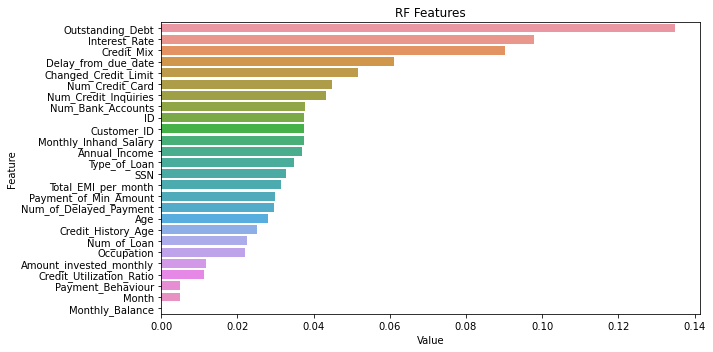

In [89]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()


In [113]:
x_train = newtrain.drop(['Credit_Score', 'Monthly_Balance', 'Month', 'Payment_Behaviour', 'Credit_Utilization_Ratio',
                        'Amount_invested_monthly'], axis = 1)
y_train = newtrain['Credit_Score']
x_test = newtest.drop(['Monthly_Balance', 'Month', 'Payment_Behaviour', 'Credit_Utilization_Ratio',
                        'Amount_invested_monthly'], axis = 1)

In [115]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [110]:
solution = pd.DataFrame({'ID': test.ID, 'Credit_Score': le.inverse_transform(y_pred)})
solution.to_csv('Solution.csv', index = False)